# 01.Extraccion de Datos

## Precio Historico del Dolar
Vamos a utilizar yahoo finance para extraer el precio historico del dolar de la siguiente manera:

In [6]:
import yfinance as yf
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

# Extraer los datos de Yahoo Finance de los ultimos 5 años del dolar en COP
start = datetime.datetime.now() - datetime.timedelta(days=5*365)
end = datetime.datetime.now()
ticker = 'COP=X'  # Ticker para el dólar en COP
# Descargar los datos
data = yf.download(ticker, start=start, end=end)
data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,COP=X,COP=X,COP=X,COP=X,COP=X
Date,,,,,
2020-04-22,4045.770020,4050.040039,4041.000000,4045.770020,0
2020-04-23,4026.000000,4032.250000,4006.030029,4029.250000,0
2020-04-24,4020.239990,4043.110107,4018.939941,4020.239990,0
2020-04-27,4039.750000,4040.219971,4039.000000,4039.750000,0
2020-04-28,4033.689941,4058.820068,4015.165283,4033.689941,0


In [7]:
# Aplanar columnas
data.columns = [f"{col[0]}_{col[1]}" for col in data.columns]

# Mostrar columnas nuevas
print(data.columns)


Index(['Close_COP=X', 'High_COP=X', 'Low_COP=X', 'Open_COP=X', 'Volume_COP=X'], dtype='object')


In [8]:
# Calcular la media movil de 30 dias
data['SMA_30'] = data['Close_COP=X'].rolling(window=30).mean()


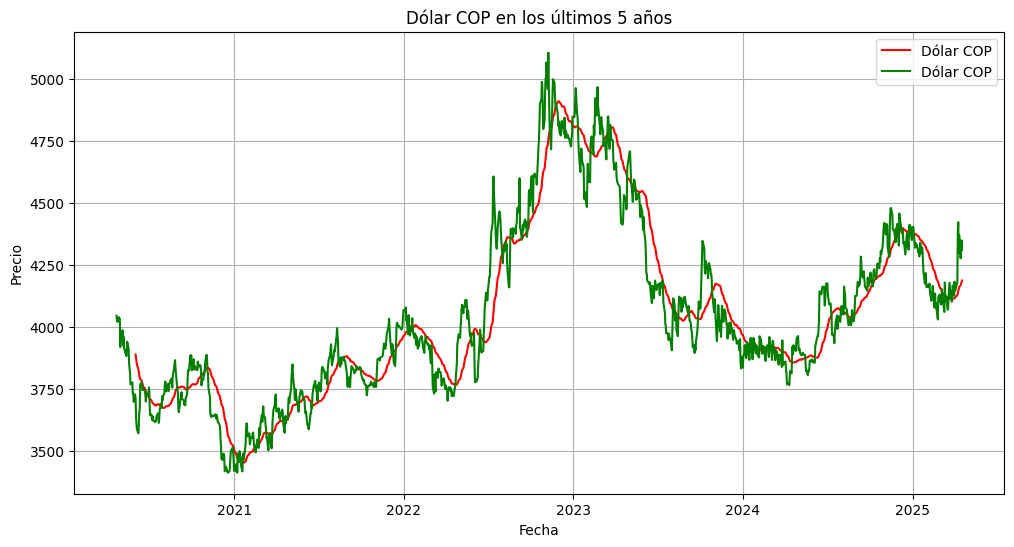

In [9]:
# Visualizacion de los datos historicos
plt.figure(figsize=(12, 6))
plt.plot(data['SMA_30'], label='Dólar COP', color='red')
plt.plot(data['Close_COP=X'], label='Dólar COP',color='green')
# mostrar labels
plt.legend()
plt.grid()
plt.title('Dólar COP en los últimos 5 años')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.show()

In [11]:
import sqlite3
import os

# Ensure the directory exists
db_path = '../Datos/data.db'
os.makedirs(os.path.dirname(db_path), exist_ok=True)

# Connect to the database and save the data
conn = sqlite3.connect(db_path)
data.to_sql('historic', conn, if_exists='append', index=False)
conn.close()



## Noticias Economicas

In [12]:
import requests
import pandas as pd
from datetime import datetime, timedelta

# Configuración
api_key = 'a8a6fc010f8445b7b236369fb7bf273d'
query = 'dólar OR USD'
dias = 15  # Últimos 15 días
hoy = datetime.today()

noticias = []

for i in range(dias):
    fecha = hoy - timedelta(days=i)
    desde = fecha.strftime('%Y-%m-%d')
    hasta = (fecha + timedelta(days=1)).strftime('%Y-%m-%d')

    url = (
        f'https://newsapi.org/v2/everything?q={query}'
        f'&language=es&from={desde}&to={hasta}'
        f'&sortBy=publishedAt&pageSize=3&apiKey={api_key}'
    )

    response = requests.get(url)
    data = response.json()

    # Procesar resultados si los hay
    for art in data.get('articles', []):
        noticias.append({
            'fecha': art['publishedAt'],
            'fuente': art['source']['name'],
            'titulo': art['title'],
            'descripcion': art['description'],
            'url': art['url']
        })

# Crear DataFrame
df_noticias = pd.DataFrame(noticias)

# Mostrar resultados
print(df_noticias.head(10))


                  fecha              fuente  \
0  2025-04-20T19:42:16Z         Eldiario.es   
1  2025-04-20T19:03:00Z  Criptonoticias.com   
2  2025-04-20T18:18:19Z         Eldiario.es   
3  2025-04-20T23:59:00Z       Forbes.com.mx   
4  2025-04-20T23:50:30Z       Elespanol.com   
5  2025-04-20T22:30:11Z           La Nacion   
6  2025-04-19T23:46:00Z       Cointelegraph   
7  2025-04-19T23:39:00Z           La Nacion   
8  2025-04-19T23:04:21Z           La Nacion   
9  2025-04-18T23:30:00Z           La Nacion   

                                              titulo  \
0  Del huerto urbano a los mejores restaurantes: ...   
1  Solana lleva la batuta del alza esta semana y ...   
2  El precio del plátano sigue sin techo: el cons...   
3  Empobrecer al prójimo es perjudicarse: arancel...   
4  Replantearse las represalias por los aranceles...   
5  El traslado a precios del nuevo dólar aún no s...   
6  El equilibrio del inversor: Rentabilidad y con...   
7                        El imperi

In [13]:
# Poner en formato DD/MM/YYYY
df_noticias['fecha'] = pd.to_datetime(df_noticias['fecha']).dt.strftime('%d/%m/%Y')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, '20/04/2025'),
  Text(1, 0, '19/04/2025'),
  Text(2, 0, '18/04/2025'),
  Text(3, 0, '17/04/2025'),
  Text(4, 0, '16/04/2025'),
  Text(5, 0, '15/04/2025'),
  Text(6, 0, '14/04/2025'),
  Text(7, 0, '13/04/2025'),
  Text(8, 0, '12/04/2025'),
  Text(9, 0, '11/04/2025'),
  Text(10, 0, '10/04/2025'),
  Text(11, 0, '09/04/2025'),
  Text(12, 0, '08/04/2025')])

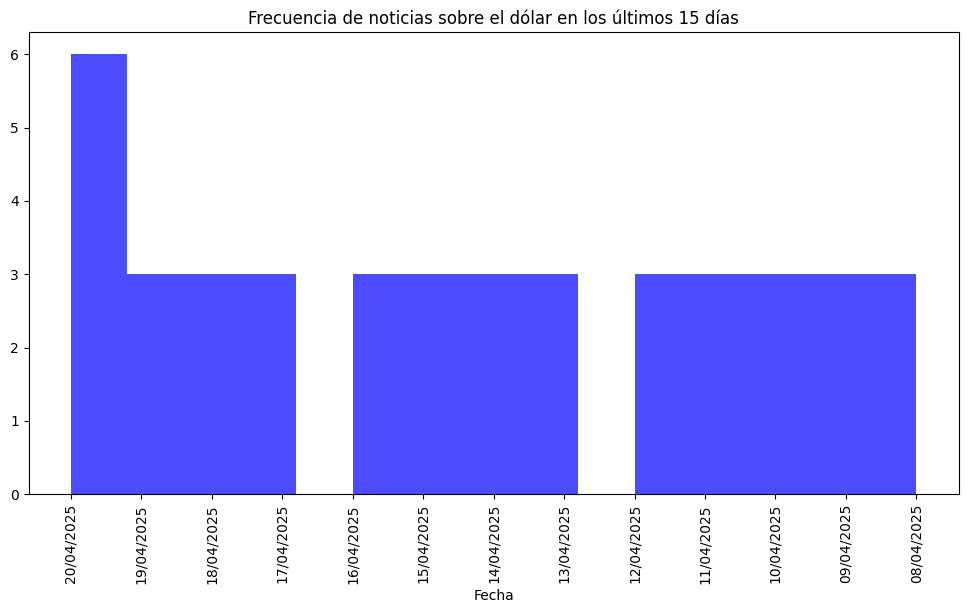

In [14]:
plt.figure(figsize=(12, 6))
plt.hist(df_noticias['fecha'], bins=15, color='blue', alpha=0.7)
plt.xlabel('Fecha')
plt.title('Frecuencia de noticias sobre el dólar en los últimos 15 días')
plt.xticks(rotation=90)

Exportar data a la base de datos

In [15]:
import sqlite3

# Conectamos (crea el archivo si no existe)
conn = sqlite3.connect('../Datos/data.db')

# Guardamos en una tabla llamada "tweets"
df_noticias.to_sql('news', conn, if_exists='append', index=False)

# Cerramos conexión
conn.close()
